# EDA Analysis of Banking Data

### Submitted by Ahsan (K21-4175) & Quamber (K21-4201)

# Importing Libraries

In [30]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

# Bank Client Data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
file_read = pd.read_csv("dataset/train.csv", sep=';')
df = pd.DataFrame(file_read, index=None)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

# Checking for Duplicates values

In [4]:
count = df.duplicated().sum()
print(count)

0


# Checking for NULL values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Analysing the Job attribute of the dataset

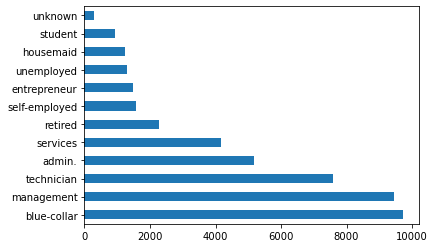

In [6]:
df.job.value_counts()

#plot the bar graph of percentage job categories
df.job.value_counts().plot.barh()
plt.show()

# Analysing the Education attribute of the dataset

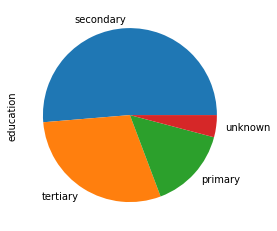

In [7]:
df.education.value_counts(normalize=True)

df.education.value_counts(normalize=True).plot.pie()
plt.show()

# Analysing the Marital Status attribute of the dataset

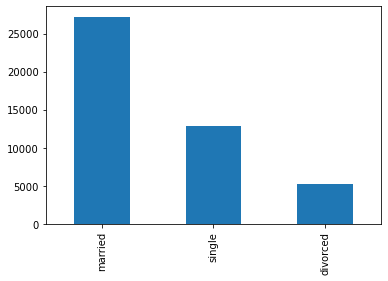

In [20]:
import matplotlib.pyplot as plt

df.marital.value_counts()

#plot the bar graph of percentage job categories
df.marital.value_counts().plot.bar()
plt.show()

# Checking the month in which more calls have been made

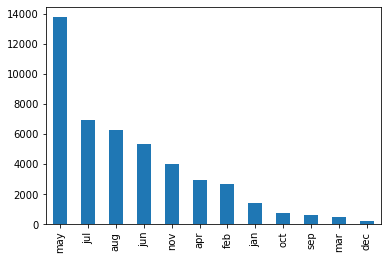

In [8]:
import matplotlib.pyplot as plt

df.month.value_counts()

#plot the bar graph of percentage job categories
df.month.value_counts().plot.bar()
plt.show()

# Describing Multiple Features of the Dataset

In [11]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [12]:
df.loan.describe()

count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object

In [13]:
df.housing.describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [14]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [15]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [16]:
df.default.describe()

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

In [17]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

# Comparing Age, Duration, Balance and Outcome of current campaign

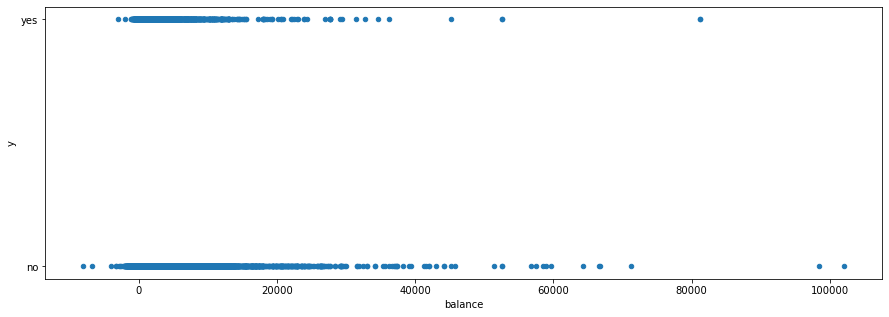

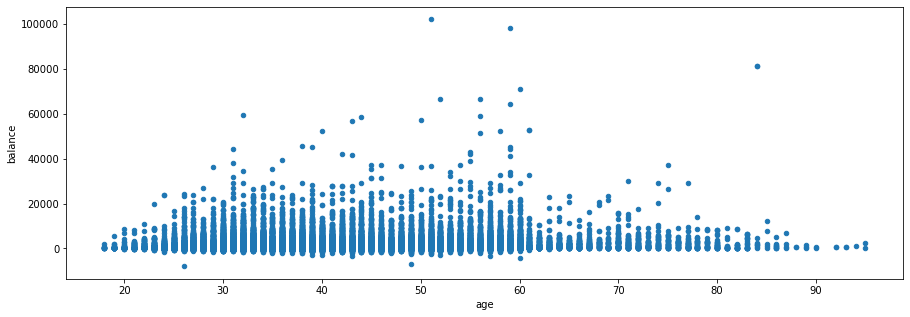

In [64]:
df.plot.scatter(x="balance",y="y",figsize = (15,5))
plt.show()


df.plot.scatter(x="age",y="balance",figsize = (15,5))
plt.show()


# Correlation Matrix Between all attributes

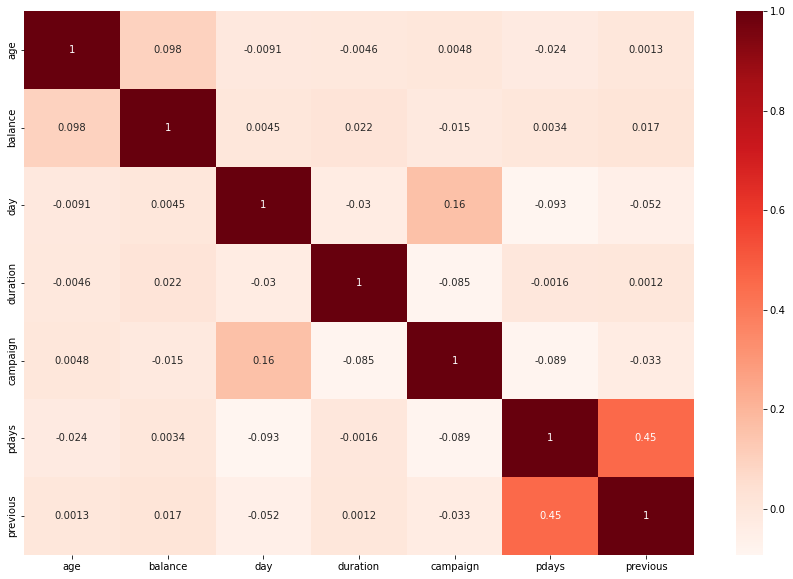

In [20]:
df[['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']].corr()
plt.subplots(figsize=(15,10))
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df[['age', 'job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']].corr(), annot=True, cmap = 'Reds')


plt.show()

In [21]:
df.groupby('y')['balance'].mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [22]:
df.groupby('y')['balance'].median()

y
no     417.0
yes    733.0
Name: balance, dtype: float64

# The people who takes home loan, also takes personal loan as well. Is it true?

H₀: The House Loan Variable and Personal Loan Variable have no relationship                                                                          

H₁: There is a relationship between House Loan and Personal Loan variables

In [23]:
data =  file_read[['housing','loan']]
data.head()

,housing,loan
0,yes,no
1,yes,no
2,yes,yes
3,yes,no
4,no,no


In [24]:
contigency= pd.crosstab(data['housing'], df['loan'])
contigency

loan,no,yes
housing,,
no,17204,2877
yes,20763,4367


In [25]:
stat, p, dof, expected = chi2_contingency(contigency)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.7315256945310098e-18
Dependent (reject H0)


# Using ANOVA, Checking if the marketing team approach customer with respect to their job title?

Null Hypothesis – There is no significant difference among the groups

Alternate Hypothesis – There is a significant difference among the groups

In [36]:

np.random.seed(1234)
dataNew=pd.DataFrame({
'management':random.sample(list(file_read['duration'][file_read['job']=='management']),10),
'technician':random.sample(list(file_read['duration'][file_read['job']=='technician']),10),
'entrepreneur':random.sample(list(file_read['duration'][file_read['job']=='entrepreneur']),10),
'blue-collar':random.sample(list(file_read['duration'][file_read['job']=='blue-collar']),10),
'unknown':random.sample(list(file_read['duration'][file_read['job']=='unknown']),10),
'retired':random.sample(list(file_read['duration'][file_read['job']=='retired']),10),
'admin.':random.sample(list(file_read['duration'][file_read['job']=='admin.']),10),
'services':random.sample(list(file_read['duration'][file_read['job']=='services']),10),
'self-employed':random.sample(list(file_read['duration'][file_read['job']=='self-employed']),10),
'unemployed':random.sample(list(file_read['duration'][file_read['job']=='unemployed']),10),
'housemaid':random.sample(list(file_read['duration'][file_read['job']=='housemaid']),10),
'student':random.sample(list(file_read['duration'][file_read['job']=='student']),10)
})



In [37]:
F, p = stats.f_oneway(dataNew['management'],dataNew['technician'],dataNew['entrepreneur'],dataNew['blue-collar'],dataNew['unknown'],dataNew['retired'],dataNew['admin.'],dataNew['services'],dataNew['self-employed'],dataNew['unemployed'],dataNew['housemaid'],dataNew['student'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.556, p=0.861


We see that p-value > 0.05. Hence, we do not reject the Null Hypothesis – There is no significant difference among the groups.

# Analysing the outcomes of the previous campaign

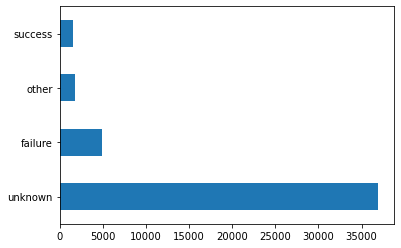

In [9]:
import matplotlib.pyplot as plt

df.poutcome.value_counts(normalize=False)

#plot the bar graph of percentage job categories
df.poutcome.value_counts(normalize=False).plot.barh()
plt.show()

# Analysing the success rate of current campaign

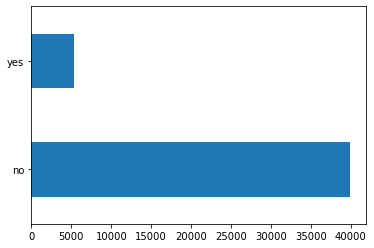

In [10]:
import matplotlib.pyplot as plt

df.y.value_counts()

#plot the bar graph of percentage job categories
df.y.value_counts().plot.barh()
plt.show()

# Comparing the "y" with "Poutcomes"

<AxesSubplot:ylabel='poutcome'>

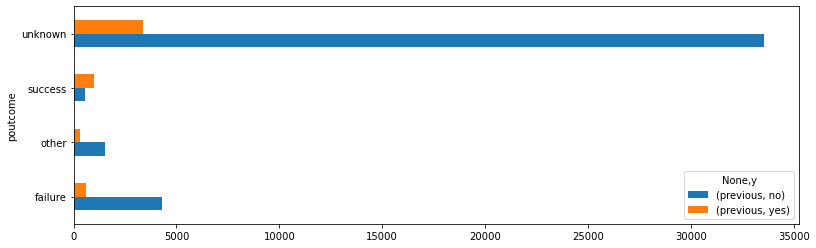

In [70]:
table = pd.pivot_table(file_read, values=['previous'], index='poutcome',
                    columns=['y'], aggfunc='count')

table.plot(kind='barh', legend=True, figsize=(13,4))

<AxesSubplot:xlabel='poutcome'>

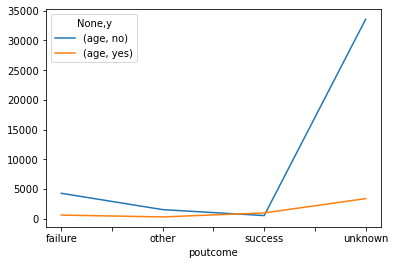

In [27]:
table1 = pd.pivot_table(file_read, values=['age'], index='poutcome',
                    columns=['y'], aggfunc='count')

table1.plot()

# Conclusion

1. admin jobs have subscribed more for the deposits than people with any other profession
2. People who are married are contacted more by the bank.
4. Most people are contacted more in cellular than telephone.
5. More people contacted on cellular by bank have subscribed the deposits offered by the bank than the ones contacted on telephone.
6. People contacted by the bank with university degree as their educational qualification are more than the people with any other educational qualification. Bank has not contacted illiterate people.
7. People with university degree as education qualification are the most who have subscribed for the deposits. They are also the most who have not subscribed for deposits.
8. People contacted in May have higher chances to subscribe for longer term deposits
9. Very few people from previous marketing strategy have subscribed for the deposits.